# cifar10 辨识

## 步骤1：载入 cifar10 资料

In [1]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 载入 cifar10 资料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 训练/测试资料的 X/y 维度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 转成单色

In [2]:
# 转成单色：rgb_to_grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
print(x_train.shape, x_test.shape)

(50000, 32, 32, 1) (10000, 32, 32, 1)


## 步骤2：资料清理，此步骤无需进行

## 步骤3：进行特征工程，将特征缩放成(0, 1)之间

In [3]:
# 特征缩放，使用常态化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255, x_test / 255

In [4]:
# 确认转换成功
x_train_norm[0]

<tf.Tensor: shape=(32, 32, 1), dtype=float32, numpy=
array([[[0.23921569],
        [0.1764706 ],
        [0.1882353 ],
        ...,
        [0.5372549 ],
        [0.50980395],
        [0.5058824 ]],

       [[0.07058824],
        [0.        ],
        [0.03921569],
        ...,
        [0.36862746],
        [0.3529412 ],
        [0.36862746]],

       [[0.09411765],
        [0.03137255],
        [0.12156863],
        ...,
        [0.3529412 ],
        [0.35686275],
        [0.3137255 ]],

       ...,

       [[0.6784314 ],
        [0.6039216 ],
        [0.6117647 ],
        ...,
        [0.5254902 ],
        [0.13725491],
        [0.14901961]],

       [[0.57254905],
        [0.5019608 ],
        [0.56078434],
        ...,
        [0.59607846],
        [0.27058825],
        [0.23137255]],

       [[0.5882353 ],
        [0.53333336],
        [0.5764706 ],
        ...,
        [0.7372549 ],
        [0.4862745 ],
        [0.3882353 ]]], dtype=float32)>

## 步骤4：资料分割，此步骤无需进行，载入MNIST资料时，已经切割好了

## 步骤5：建立模型结构

## 步骤6：结合训练资料及模型，进行模型训练

## 步骤7：评分(Score Model)

In [5]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=x_train.shape[1:3]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 设定优化器(optimizer)、损失函数(loss)、效能衡量指标(metrics)的类别
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 模型训练
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 评分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10
1250/1250 [==============================] - 4s 2ms/step - loss: 2.1997 - accuracy: 0.1846 - val_loss: 2.0389 - val_accuracy: 0.2649
Epoch 2/10
1250/1250 [==============================] - 2s 1ms/step - loss: 2.0566 - accuracy: 0.2457 - val_loss: 1.9794 - val_accuracy: 0.2933
Epoch 3/10
1250/1250 [==============================] - 2s 1ms/step - loss: 2.0148 - accuracy: 0.2685 - val_loss: 1.9372 - val_accuracy: 0.3068
Epoch 4/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.9957 - accuracy: 0.2731 - val_loss: 1.9169 - val_accuracy: 0.3187
Epoch 5/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.9694 - accuracy: 0.2865 - val_loss: 1.9163 - val_accuracy: 0.3055
Epoch 6/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.9532 - accuracy: 0.2963 - val_loss: 1.8882 - val_accuracy: 0.3302
Epoch 7/10
1250/1250 [==============================] - 2s 1ms/step - loss: 1.9468 - accuracy: 0.2960 - val_loss: 1.8758 - val_accuracy:

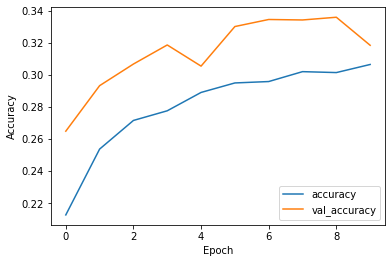

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 132,490
Trainable params: 132,490
Non-trainable params: 0
_________________________________________________________________
